# Titanic Survival Prediction

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Data acquisition
Download the data from this link : https://www.kaggle.com/c/titanic/data

In [242]:
df_train = pd.read_csv('data/titanic/train.csv')
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [243]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2) Data description
Try to get the main information about the dataset

In [244]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [245]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## 3) Exploratory data analysis
For every data science project, the most important part is understanding the data.
Exploratory data anaylysis is an analysis approach that identifies general patterns in the data. Try to learn as much as you can about the dataset :

In [246]:
# TO-DO : Separate the dataset to 2 dataset : one for numerical data and one for categorical data
# Variable numérique : PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare
# Variable catégorielle : Sex, Name, Ticket, Cabin, Embarked 
df_num = df_train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df_train[['Sex', 'Name', 'Ticket', 'Cabin', 'Embarked']]

In [247]:
df_num

Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]

In [248]:
df_cat

Sex                                               Name  \
0      male                            Braund, Mr. Owen Harris   
1    female  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2    female                             Heikkinen, Miss. Laina   
3    female       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4      male                           Allen, Mr. William Henry   
..      ...                                                ...   
886    male                              Montvila, Rev. Juozas   
887  female                       Graham, Miss. Margaret Edith   
888  female           Johnston, Miss. Catherine Helen "Carrie"   
889    male                              Behr, Mr. Karl Howell   
890    male                                Dooley, Mr. Patrick   

               Ticket Cabin Embarked  
0           A/5 21171   NaN        S  
1            PC 17599   C85        C  
2    STON/O2. 3101282   NaN        S  
3              113803  C123        S  
4              373450   NaN        S  
..                ...   ...      ...  
886            211536   NaN        S  
887            112053   B42        S  
888        W./C. 6607   NaN        S  
889            111369  C148        C  
890            370376   NaN        Q  

[891 rows x 5 columns]

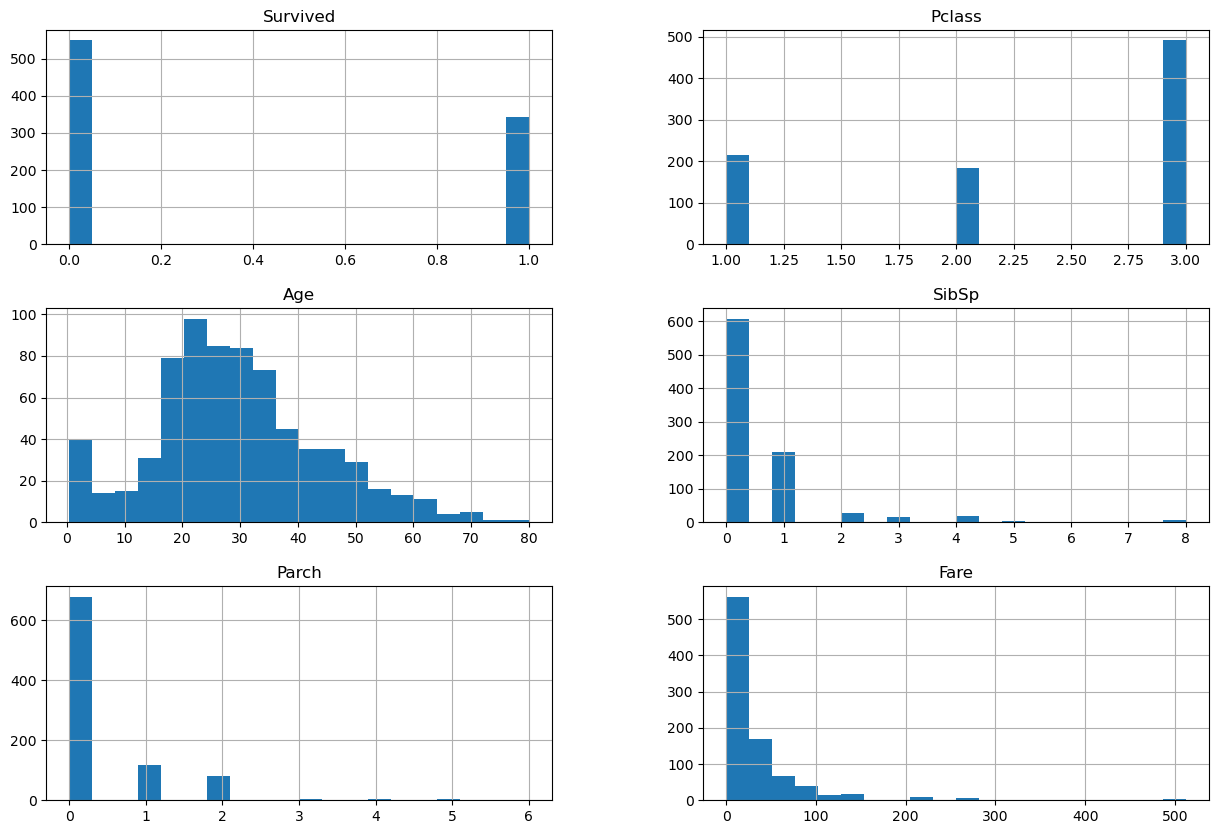

In [249]:
# TO-DO : Using matplotlib histograms, draw the distributions for numerical data

# Créons des histogrammes pour chaque colonne numérique
df_num.hist(bins=20, figsize=(15, 10))
plt.show()

In [250]:
# TO-DO : Using seaborn, draw the heatmap for the correlation matrix and explain its role
# Calculons la matrice de corrélation
corr_matrix = df_num.corr()


<Axes: >

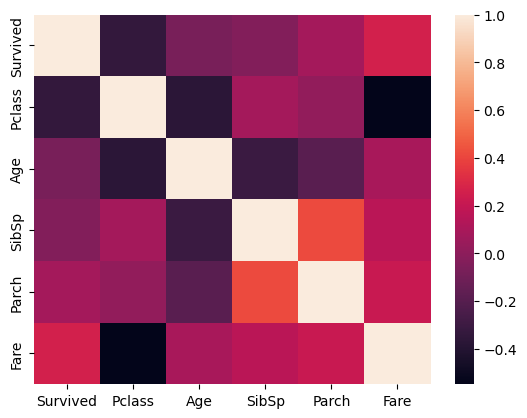

In [251]:
sns.heatmap(corr_matrix)

La matrice de corrélation obtenue indique les coefficients de corrélation entre les différentes paires de variables.

Survived et Pclass : Il y a une corrélation négative significative (-0.3). Cela signifie que les personnes ayant une classe de billet plus élevée (nombre plus faible pour Pclass) avaient tendance à avoir une plus grande chance de survie.

Survived et Fare : Il y a une corrélation positive (0.26). Cela suggère que des tarifs de billets plus élevés étaient associés à une plus grande chance de survie correspondant aussi à la premier classe.

Pclass et Age : Il y a une corrélation négative (-0.37). Cela indique que les personnes dans des classes de billets plus élevées avaient tendance à être plus jeunes.

Pclass et Fare : Il y a une corrélation négative significative (-0.55). Cela confirme que les tarifs de billets étaient généralement plus bas pour les classes de billets plus élevées.

SibSp et Parch : Il y a une corrélation positive (0.41). Cela peut indiquer que les personnes ayant plus de frères, soeurs, conjoints, enfants ou parents à bord avaient tendance à voyager avec des familles plus grandes.

Age et SibSp : Il y a une corrélation négative (-0.31). Cela peut s'expliquer par le fait que les jeunes voyageaient souvent avec des frères et soeurs, tandis que les personnes plus âgées voyageaient avec conjoints et enfants.

Parch et Fare: Il y a une corrélation positive  (0.22). Cela peut indiquer que les tarifs de billets étaient plus élevés pour les personnes voyageant avec de plus grandes familles.


In [252]:
# TO-DO : 
    # Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation
    
# Créons un tableau croisé dynamique avec agrégation mean
pivot_table_mean = pd.pivot_table(df_num, index='Survived', aggfunc='mean')

# Affichage du tableau croisé dynamique 
print(pivot_table_mean)

                Age       Fare     Parch    Pclass     SibSp
Survived                                                    
0         30.626179  22.117887  0.329690  2.531876  0.553734
1         28.343690  48.395408  0.464912  1.950292  0.473684


En analysant les résultats, nous constatons que les passagers survivants ont en moyenne 28 ans. Ils ont payé des tarifs plus élevés (48.395408 en moyenne). Ils voyagent plus fréquemment avec des parents ou des enfants, détiennent des billets de classe supérieure, et ont un nombre légèrement inférieur de frères et soeurs ou époux à bord par rapport aux passagers décédés.

In [253]:
# TO-DO : 
    # Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation

# Créons un tableau croisé dynamique avec agrégation mean
pivot_table_mean = pd.pivot_table(df_num, index='Pclass', aggfunc='mean')

# Affichage du tableau croisé dynamique 
print(pivot_table_mean)

              Age       Fare     Parch     SibSp  Survived
Pclass                                                    
1       38.233441  84.154687  0.356481  0.416667  0.629630
2       29.877630  20.662183  0.380435  0.402174  0.472826
3       25.140620  13.675550  0.393075  0.615071  0.242363


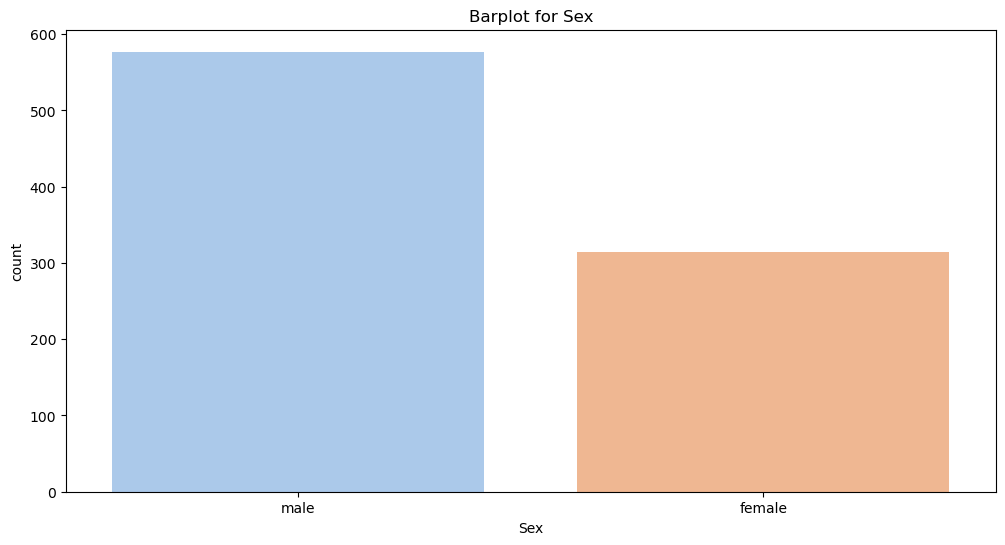

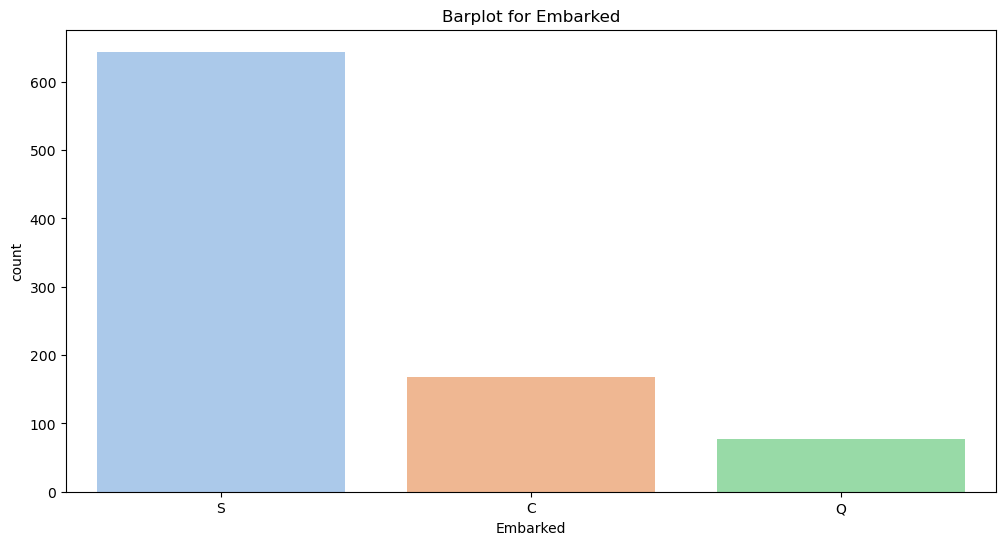

In [254]:
# TO-DO : Using sns barplot, draw the barplots for the categorical variables

# Traçons des barplots pour chaque variable catégorielle

df_categorielle1 = df_train[['Sex', 'Embarked']]

# Plot barplots for each categorical variable
for column in df_categorielle1.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df_categorielle1, palette='pastel')
    plt.title(f'Barplot for {column}')
    plt.show()



In [255]:
# TO-DO : 
    # Create the pivot table for the categorical variables for which it makes sense
    # Explain why it doesn not make sense for the others
    
# Créer une table pivot pour les variables catégoriques pertinentes ('Sex' et 'Embarked')
pivot_table_Embarked = pd.pivot_table(df_train, index= 'Survived', columns='Embarked', values='PassengerId' ,aggfunc='count')
# Afficher la table pivotante
print("Tableau croisé dynamique avec Agrégation Count :")
print(pivot_table_Embarked)

Tableau croisé dynamique avec Agrégation Count :
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Les résultats représentent le nombre de passagers ayant survécu (1) et celles n'ayant pas survécu (0) en fonction du lieu d'embarquement (C, Q, S). Voici une analyse basée sur ces chiffres :

73  passagers ayant embarqués au port de C (Cherbourg) n'ont pas survécu tant dis que 93 ont survécu.
47  passagers ayant embarqués au port de Q (Queenstown) n'ont pas survécu tant dis que 30 ont survécu.
427 passagers ayant embarqués au port de S (Southampton) n'ont pas survécu tant dis que 217 ont survécu.

In [256]:
# TO-DO : 
    # Create the pivot table for the categorical variables for which it makes sense
    # Explain why it doesn not make sense for the others
    
# Créer une table pivot pour les variables catégoriques pertinentes ('Sex' et 'Embarked')
pivot_table_sex = pd.pivot_table(df_train, index= 'Survived', columns='Sex', values='PassengerId' ,aggfunc='count')
print(pivot_table_sex)

Sex       female  male
Survived              
0             81   468
1            233   109


Les résultats représentent le nombre de passagers ayant survécu (1) et celles n'ayant pas survécu (0) en fonction du sexe (male, female). Voici une analyse basée sur ces chiffres :

81 femmes n'ont pas survécu tant dis que 233 ont survécu.
468 hommes n'ont pas survécu tant dis que 109 ont survécu.

In [257]:
# TO-DO : 
    # Explore the variable Cabin's values
    # Can we use this variable directly? if not, how can we exploit it efficiently
cabin_distribution = df_cat['Cabin'].value_counts()
 
# Affichez la distribution
print(cabin_distribution)


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64


Nous remarquons que la variable cabin a une distribution différente a chaque individu( certains ont une ou plusieurs cabines voir meme une valeur non defnie(NAN) de cabine) donc nous pouvons supposer que cette variable est utile dans notre analyse et approfondie la manipulation sur cet attribut.

## 4) Data Engineering
When exploiting datasets, data engineering is an important preprocessing step. Its goal is to extract more information from the data so to increase the predictive power of the machine learning model.
Identify some variables on which we can apply data engineering and explain what type of information can be extratced from them.

In [258]:
# Here is an example of data engineering from the variable Cabin, we used it to create a new variable called Cabin_multiple that contains the number of cabins per passenger.
df_train['Cabin_multiple'] = df_train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [259]:
# TO-DO : Create the pivot table for the newly created attribute.

# En supposant que df_train est votre DataFrame
# Si ce n'est pas le cas, remplacez-le par le nom réel de votre DataFrame

# Table de pivot
Cabin_multiple = pd.pivot_table(df_train, values='PassengerId', index='Cabin_multiple', columns='Pclass', aggfunc='count', fill_value=0)

# Afficher la table pivot
print(Cabin_multiple)

Pclass            1    2    3
Cabin_multiple               
0                40  168  479
1               156   16    8
2                12    0    4
3                 6    0    0
4                 2    0    0


In [260]:
# TO-DO : Create the pivot table for the newly created attribute.

# Here is an example of data engineering from the variable Cabin, we used it to create a new variable called Cabin_multiple that contains the number of cabins per passenger.
df_train['Ticket_multiple'] = df_train.Ticket.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Ticket_multiple'].value_counts()
# En supposant que df_train est votre DataFrame
# Si ce n'est pas le cas, remplacez-le par le nom réel de votre DataFrame

# Table de pivot
Ticket_multiple = pd.pivot_table(df_train, values='PassengerId', index='Ticket_multiple', columns='Pclass', aggfunc='count', fill_value=0)

# Afficher la table pivot
print(Ticket_multiple)

Pclass             1    2    3
Ticket_multiple               
1                152  127  386
2                 64   56   93
3                  0    1   12


In [261]:
# TO-DO : Create the variables you think might be interesting then draw the pivot tables for the variables you create
#  Créez les variables que vous pensez être intéressantes, puis dessinez les tables pivot pour les variables que vous créez


df_train['Classe_age'] = pd.cut(df_train['Age'], bins=[0, 17, 26, 50, 100], labels=['0-17', '18-26', '27-50', '51+'])
df_train['Taille_famille'] = df_train['SibSp'] + df_train['Parch']

# Tables de pivot
Classe_age = pd.pivot_table(df_train, values='PassengerId', index='Classe_age', columns='Pclass', aggfunc='count', fill_value=0)
Taille_famille = pd.pivot_table(df_train, values='PassengerId', index='Taille_famille', columns='Pclass', aggfunc='count', fill_value=0)

print("\nTable pivot pour la catégories d'âge :")
print(Classe_age)

print("\nTable pivot pour la taille des familles :")
print(Taille_famille)



Table pivot pour la catégories d'âge :
Pclass        1   2    3
Classe_age              
0-17         12  23   78
18-26        32  44  130
27-50       103  91  137
51+          39  15   10

Table pivot pour la taille des familles :
Pclass            1    2    3
Taille_famille               
0               109  104  324
1                70   34   57
2                24   31   47
3                 7   13    9
4                 2    1   12
5                 4    1   17
6                 0    0   12
7                 0    0    6
10                0    0    7


## 5) Data Preperation
All of the operations done so far were done on the training set. However, when we test our model, the test data needs to have the same format as the training data (the created variables, the deleted variables, ...).

Toutes les opérations effectuées jusqu'à présent ont été réalisées sur l'ensemble d'entraînement. Cependant, lors de la mise à l'épreuve de notre modèle, les données de test doivent avoir le même format que les données d'entraînement (les variables créées, les variables supprimées, ...).

### 5.1) Data transformation:
A quick way to do that, is to combine both datasets and apply the operations applied previously on the combined dataset.

Une manière rapide de le faire est de combiner les deux ensembles de données et d'appliquer les opérations précédemment effectuées sur l'ensemble de données combiné.

In [262]:
df_test = pd.read_csv('data/titanic/test.csv')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [263]:
import numpy as np
df_train['train'] = 1
df_test['train'] = 0
df_test['Survived'] = np.NaN
df_all = pd.concat([df_train, df_test])
df_all.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Cabin_multiple  \
0      0         A/5 21171   7.2500   NaN        S             0.0   
1      0          PC 17599  71.2833   C85        C             1.0   
2      0  STON/O2. 3101282   7.9250   NaN        S             0.0   
3      0            113803  53.1000  C123        S             1.0   
4      0            373450   8.0500   NaN        S             0.0   

   Ticket_multiple Classe_age  Taille_famille  train  
0              2.0      18-26             1.0      1  
1              2.0      27-50             1.0      1  
2              2.0      18-26             0.0      1  
3              1.0      27-50             1.0      1  
4              1.0      27-50             0.0      1

In [264]:
# TO-DO : Use the .info() function from pandas and get the information about the dataset after the changes
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      1309 non-null   int64   
 1   Survived         891 non-null    float64 
 2   Pclass           1309 non-null   int64   
 3   Name             1309 non-null   object  
 4   Sex              1309 non-null   object  
 5   Age              1046 non-null   float64 
 6   SibSp            1309 non-null   int64   
 7   Parch            1309 non-null   int64   
 8   Ticket           1309 non-null   object  
 9   Fare             1308 non-null   float64 
 10  Cabin            295 non-null    object  
 11  Embarked         1307 non-null   object  
 12  Cabin_multiple   891 non-null    float64 
 13  Ticket_multiple  891 non-null    float64 
 14  Classe_age       714 non-null    category
 15  Taille_famille   891 non-null    float64 
 16  train            1309 non-null   int64   
d

In [265]:
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].median())
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].median())
#df_all['Survived'] = df_all['Survived'].fillna(df_all['Survived'].median())

In [266]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      1309 non-null   int64   
 1   Survived         891 non-null    float64 
 2   Pclass           1309 non-null   int64   
 3   Name             1309 non-null   object  
 4   Sex              1309 non-null   object  
 5   Age              1309 non-null   float64 
 6   SibSp            1309 non-null   int64   
 7   Parch            1309 non-null   int64   
 8   Ticket           1309 non-null   object  
 9   Fare             1309 non-null   float64 
 10  Cabin            295 non-null    object  
 11  Embarked         1307 non-null   object  
 12  Cabin_multiple   891 non-null    float64 
 13  Ticket_multiple  891 non-null    float64 
 14  Classe_age       714 non-null    category
 15  Taille_famille   891 non-null    float64 
 16  train            1309 non-null   int64   
d

In [267]:
df_all['Survived'].isnull().sum()

418

### 5.2) Handling missing data : 
There are different ways to handle missing data in a dataset. Name some of them.

List the variables with missing values.

For every variable named, handle the missing variables in the way you see fits.

Il existe différentes façons de gérer les données manquantes dans un ensemble de données. En voici quelques-unes.

Énumérez les variables avec des valeurs manquantes.

Pour chaque variable nommée, traitez les valeurs manquantes de la manière qui vous semble appropriée.

In [268]:
df_all['Cabin_multiple'] = df_all['Cabin_multiple'].fillna(df_all['Cabin_multiple'].median())
df_all['Taille_famille'] = df_all['Taille_famille'].fillna(df_all['Taille_famille'].median())

Nous avons utilisé dans un premier temps la fonction Describe() pour connaitre les colonnes avec des valeurs manquantes.  Ensuite nous avons remplacer ces valeurs manquantes par la médiane de la variable étudiée.

In [269]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      1309 non-null   int64   
 1   Survived         891 non-null    float64 
 2   Pclass           1309 non-null   int64   
 3   Name             1309 non-null   object  
 4   Sex              1309 non-null   object  
 5   Age              1309 non-null   float64 
 6   SibSp            1309 non-null   int64   
 7   Parch            1309 non-null   int64   
 8   Ticket           1309 non-null   object  
 9   Fare             1309 non-null   float64 
 10  Cabin            295 non-null    object  
 11  Embarked         1307 non-null   object  
 12  Cabin_multiple   1309 non-null   float64 
 13  Ticket_multiple  891 non-null    float64 
 14  Classe_age       714 non-null    category
 15  Taille_famille   1309 non-null   float64 
 16  train            1309 non-null   int64   
d

### 5.3) Categorical variables transformation : 
Fully connected neural networks (FCNNs) are known for not being able to handle categorical variables in their natural state.

Using one hot encoding (.get dummies function from pandas), create a new version of the dataset with transformed categorical variables.

Les réseaux de neurones entièrement connectés (FCNN) sont connus pour leur incapacité à gérer les variables catégorielles dans leur état naturel.

En utilisant un encodage à chaud (.get dummies function from pandas), créez une nouvelle version de l'ensemble de données avec des variables catégorielles transformées

In [270]:
# Convert 'Pclass' to string
df_all['Pclass'] = df_all['Pclass'].astype(str)

# Liste des variables catégorielles
cat_vars = ['Pclass', 'Embarked', 'Cabin_multiple', 'Sex', 'Classe_age', 'Taille_famille', 'Ticket_multiple']

# Appliquez l'encodage à chaud à chaque variable catégorielle
df_all_new_version = pd.get_dummies(df_all, columns=cat_vars)

#Affichage de la nouvelle version obtenue
df_all_new_version


PassengerId  Survived                                               Name  \
0              1       0.0                            Braund, Mr. Owen Harris   
1              2       1.0  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       1.0                             Heikkinen, Miss. Laina   
3              4       1.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       0.0                           Allen, Mr. William Henry   
..           ...       ...                                                ...   
413         1305       NaN                                 Spector, Mr. Woolf   
414         1306       NaN                       Oliva y Ocana, Dona. Fermina   
415         1307       NaN                       Saether, Mr. Simon Sivertsen   
416         1308       NaN                                Ware, Mr. Frederick   
417         1309       NaN                           Peter, Master. Michael J   

      Age  SibSp  Parch              Ticket      Fare Cabin  train  ...  \
0    22.0      1      0           A/5 21171    7.2500   NaN      1  ...   
1    38.0      1      0            PC 17599   71.2833   C85      1  ...   
2    26.0      0      0    STON/O2. 3101282    7.9250   NaN      1  ...   
3    35.0      1      0              113803   53.1000  C123      1  ...   
4    35.0      0      0              373450    8.0500   NaN      1  ...   
..    ...    ...    ...                 ...       ...   ...    ...  ...   
413  28.0      0      0           A.5. 3236    8.0500   NaN      0  ...   
414  39.0      0      0            PC 17758  108.9000  C105      0  ...   
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN      0  ...   
416  28.0      0      0              359309    8.0500   NaN      0  ...   
417  28.0      1      1                2668   22.3583   NaN      0  ...   

     Taille_famille_2.0  Taille_famille_3.0  Taille_famille_4.0  \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   
..                  ...                 ...                 ...   
413                   0                   0                   0   
414                   0                   0                   0   
415                   0                   0                   0   
416                   0                   0                   0   
417                   0                   0                   0   

     Taille_famille_5.0  Taille_famille_6.0  Taille_famille_7.0  \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   
..                  ...                 ...                 ...   
413                   0                   0                   0   
414                   0                   0                   0   
415                   0                   0                   0   
416                   0                   0                   0   
417                   0                   0                   0   

     Taille_famille_10.0  Ticket_multiple_1.0  Ticket_multiple_2.0  \
0                      0                    0                    1   
1                      0                    0                    1   
2                      0                    0                    1   
3                      0                    1                    0   
4                      0                    1                    0   
..                   ...                  ...                  ...   
413                    0       

In [271]:
# TO-DO : Get the information for the newly created dataset

Les variables catégorielles binaires utilisées sont : Pclass, Embarked, Cabin_multiple, Sex, Classe_age, Taille_famille, Ticket_multiple
Nous obtenons dans cette nouvelle version 39  colonnes

In [272]:
existing_cols = df_all_new_version.columns
existing_cols

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'train', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_multiple_0.0',
       'Cabin_multiple_1.0', 'Cabin_multiple_2.0', 'Cabin_multiple_3.0',
       'Cabin_multiple_4.0', 'Sex_female', 'Sex_male', 'Classe_age_0-17',
       'Classe_age_18-26', 'Classe_age_27-50', 'Classe_age_51+',
       'Taille_famille_0.0', 'Taille_famille_1.0', 'Taille_famille_2.0',
       'Taille_famille_3.0', 'Taille_famille_4.0', 'Taille_famille_5.0',
       'Taille_famille_6.0', 'Taille_famille_7.0', 'Taille_famille_10.0',
       'Ticket_multiple_1.0', 'Ticket_multiple_2.0', 'Ticket_multiple_3.0'],
      dtype='object')

In [273]:
# Liste des colonnes à copier
engineer = [
            'Survived','SibSp', 'Parch',
            'Pclass_1', 'Pclass_2', 'Pclass_3',
            'Embarked_C', 'Embarked_Q', 'Embarked_S',
            'Cabin_multiple_0.0', 'Cabin_multiple_1.0', 'Cabin_multiple_2.0', 'Cabin_multiple_3.0', 'Cabin_multiple_4.0',
            'Sex_female', 'Sex_male',
            'Classe_age_0-17', 'Classe_age_18-26', 'Classe_age_27-50', 'Classe_age_51+',
            'Taille_famille_0.0', 'Taille_famille_1.0', 'Taille_famille_2.0', 'Taille_famille_3.0', 'Taille_famille_4.0',
            'Taille_famille_5.0', 'Taille_famille_6.0', 'Taille_famille_7.0', 'Taille_famille_10.0',
            'Ticket_multiple_1.0', 'Ticket_multiple_2.0', 'Ticket_multiple_3.0','train','PassengerId'
]

# Créons une nouvelle table avec les nouvelles colonnes obtenues dans l'ingénierie des données
df_all_new = df_all_new_version[engineer].copy()

# Affichage de la nouvelle table
df_all_new


Survived  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0         0.0      1      0         0         0         1           0   
1         1.0      1      0         1         0         0           1   
2         1.0      0      0         0         0         1           0   
3         1.0      1      0         1         0         0           0   
4         0.0      0      0         0         0         1           0   
..        ...    ...    ...       ...       ...       ...         ...   
413       NaN      0      0         0         0         1           0   
414       NaN      0      0         1         0         0           1   
415       NaN      0      0         0         0         1           0   
416       NaN      0      0         0         0         1           0   
417       NaN      1      1         0         0         1           1   

     Embarked_Q  Embarked_S  Cabin_multiple_0.0  ...  Taille_famille_4.0  \
0             0           1                   1  ...                   0   
1             0           0                   0  ...                   0   
2             0           1                   1  ...                   0   
3             0           1                   0  ...                   0   
4             0           1                   1  ...                   0   
..          ...         ...                 ...  ...                 ...   
413           0           1                   1  ...                   0   
414           0           0                   1  ...                   0   
415           0           1                   1  ...                   0   
416           0           1                   1  ...                   0   
417           0           0                   1  ...                   0   

     Taille_famille_5.0  Taille_famille_6.0  Taille_famille_7.0  \
0                     0                   0                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   
..                  ...                 ...                 ...   
413                   0                   0                   0   
414                   0                   0                   0   
415                   0                   0                   0   
416                   0                   0                   0   
417                   0                   0                   0   

     Taille_famille_10.0  Ticket_multiple_1.0  Ticket_multiple_2.0  \
0                      0                    0                    1   
1                      0                    0                    1   
2                      0                    0                    1   
3                      0                    1                    0   
4                      0                    1                    0   
..                   ...                  ...                  ...   
413                    0                    0                    0   
414                    0                    0                    0   
415                    0                    0                    0   
416                    0                    0                    0   
417                    0                    0                    0   

     Ticket_multiple_3.0  train  PassengerId  
0                      0      1            1  
1                      0      1            2  
2                      0      1            3  
3                      0      1            4  
4                      0      1            5  
..                   ...    ...          ...  
413                    0      0         1305  
414                    0      0         1306  
415                    0      0         1307  
416                    0      0         1308  
417                    0      0         1309  

[130

In [274]:
df_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    float64
 1   SibSp                1309 non-null   int64  
 2   Parch                1309 non-null   int64  
 3   Pclass_1             1309 non-null   uint8  
 4   Pclass_2             1309 non-null   uint8  
 5   Pclass_3             1309 non-null   uint8  
 6   Embarked_C           1309 non-null   uint8  
 7   Embarked_Q           1309 non-null   uint8  
 8   Embarked_S           1309 non-null   uint8  
 9   Cabin_multiple_0.0   1309 non-null   uint8  
 10  Cabin_multiple_1.0   1309 non-null   uint8  
 11  Cabin_multiple_2.0   1309 non-null   uint8  
 12  Cabin_multiple_3.0   1309 non-null   uint8  
 13  Cabin_multiple_4.0   1309 non-null   uint8  
 14  Sex_female           1309 non-null   uint8  
 15  Sex_male             1309 non-null   ui

In [275]:
import pandas as pd

def refor(data):
    df_t = pd.DataFrame()  # Créez un DataFrame vide pour les données d'entraînement
    df_test = pd.DataFrame()  # Créez un DataFrame vide pour les données de test

    for column in range(data.shape[0]):
        if data.iloc[column]['train'] == 1:
            df_t = df_t.append(data.iloc[column, :])
        else:
            df_test = df_test.append(data.iloc[column, :])

    return df_t, df_test

In [276]:
df_train_1, df_test_1 = refor(df_all_new)

C:\Users\esir\AppData\Local\Temp\ipykernel_14020\3483846180.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_t = df_t.append(data.iloc[column, :])
C:\Users\esir\AppData\Local\Temp\ipykernel_14020\3483846180.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_t = df_t.append(data.iloc[column, :])
C:\Users\esir\AppData\Local\Temp\ipykernel_14020\3483846180.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_t = df_t.append(data.iloc[column, :])
C:\Users\esir\AppData\Local\Temp\ipykernel_14020\3483846180.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_t = df_t.append(data.iloc[column, :])
C:\Users\esir\AppData\Local\Temp

In [277]:
Y_train_1 = df_train_1['Survived']
# Liste des colonnes à copier
engineer = [
            'SibSp', 'Parch','PassengerId',
            'Pclass_1', 'Pclass_2', 'Pclass_3',
            'Embarked_C', 'Embarked_Q', 'Embarked_S',
            'Cabin_multiple_0.0', 'Cabin_multiple_1.0', 'Cabin_multiple_2.0', 'Cabin_multiple_3.0', 'Cabin_multiple_4.0',
            'Sex_female', 'Sex_male',
            'Classe_age_0-17', 'Classe_age_18-26', 'Classe_age_27-50', 'Classe_age_51+',
            'Taille_famille_0.0', 'Taille_famille_1.0', 'Taille_famille_2.0', 'Taille_famille_3.0', 'Taille_famille_4.0',
            'Taille_famille_5.0', 'Taille_famille_6.0', 'Taille_famille_7.0', 'Taille_famille_10.0',
            'Ticket_multiple_1.0', 'Ticket_multiple_2.0', 'Ticket_multiple_3.0'
]

# Créons une nouvelle table avec les nouvelles colonnes obtenues dans l'ingénierie des données
X_train_1 = df_train_1[engineer].copy()

# Affichage de la nouvelle table
Y_train_1


0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [278]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SibSp                891 non-null    float64
 1   Parch                891 non-null    float64
 2   PassengerId          891 non-null    float64
 3   Pclass_1             891 non-null    float64
 4   Pclass_2             891 non-null    float64
 5   Pclass_3             891 non-null    float64
 6   Embarked_C           891 non-null    float64
 7   Embarked_Q           891 non-null    float64
 8   Embarked_S           891 non-null    float64
 9   Cabin_multiple_0.0   891 non-null    float64
 10  Cabin_multiple_1.0   891 non-null    float64
 11  Cabin_multiple_2.0   891 non-null    float64
 12  Cabin_multiple_3.0   891 non-null    float64
 13  Cabin_multiple_4.0   891 non-null    float64
 14  Sex_female           891 non-null    float64
 15  Sex_male             891 non-null    flo

In [279]:
from sklearn.model_selection import train_test_split
#df_train_1, df_test_1

# Diviser les données en ensemble d'entraînement et ensemble de test (80% pour l'entraînement, 20% pour le test)
X_train, X_test, Y_train, Y_test = train_test_split(df_train_1,Y_train_1, test_size=0.2, random_state=42)
 
# Diviser l'ensemble d'entraînement en ensemble d'entraînement et ensemble de validation (80% pour l'entraînement, 20% pour la validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [280]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 373 to 554
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             143 non-null    float64
 1   SibSp                143 non-null    float64
 2   Parch                143 non-null    float64
 3   Pclass_1             143 non-null    float64
 4   Pclass_2             143 non-null    float64
 5   Pclass_3             143 non-null    float64
 6   Embarked_C           143 non-null    float64
 7   Embarked_Q           143 non-null    float64
 8   Embarked_S           143 non-null    float64
 9   Cabin_multiple_0.0   143 non-null    float64
 10  Cabin_multiple_1.0   143 non-null    float64
 11  Cabin_multiple_2.0   143 non-null    float64
 12  Cabin_multiple_3.0   143 non-null    float64
 13  Cabin_multiple_4.0   143 non-null    float64
 14  Sex_female           143 non-null    float64
 15  Sex_male             143 non-null    f

In [281]:
# # Liste des colonnes à copier
# engineer = [
#             'SibSp', 'Parch','PassengerId',
#             'Pclass_1', 'Pclass_2', 'Pclass_3',
#             'Embarked_C', 'Embarked_Q', 'Embarked_S',
#             'Cabin_multiple_0.0', 'Cabin_multiple_1.0', 'Cabin_multiple_2.0', 'Cabin_multiple_3.0', 'Cabin_multiple_4.0',
#             'Sex_female', 'Sex_male',
#             'Classe_age_0-17', 'Classe_age_18-26', 'Classe_age_27-50', 'Classe_age_51+',
#             'Taille_famille_0.0', 'Taille_famille_1.0', 'Taille_famille_2.0', 'Taille_famille_3.0', 'Taille_famille_4.0',
#             'Taille_famille_5.0', 'Taille_famille_6.0', 'Taille_famille_7.0', 'Taille_famille_10.0',
#             'Ticket_multiple_1.0', 'Ticket_multiple_2.0', 'Ticket_multiple_3.0'
# ]

# # Créons une nouvelle table avec les nouvelles colonnes obtenues dans l'ingénierie des données
# X_test = X_test[engineer].copy()

# # Affichage de la nouvelle table
# # Y_train_1

In [295]:
X_test

Survived  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
709       1.0    1.0    1.0       0.0       0.0       1.0         1.0   
439       0.0    0.0    0.0       0.0       1.0       0.0         0.0   
840       0.0    0.0    0.0       0.0       0.0       1.0         0.0   
720       1.0    0.0    1.0       0.0       1.0       0.0         0.0   
39        1.0    1.0    0.0       0.0       0.0       1.0         1.0   
..        ...    ...    ...       ...       ...       ...         ...   
433       0.0    0.0    0.0       0.0       0.0       1.0         0.0   
773       0.0    0.0    0.0       0.0       0.0       1.0         1.0   
25        1.0    1.0    5.0       0.0       0.0       1.0         0.0   
84        1.0    0.0    0.0       0.0       1.0       0.0         0.0   
10        1.0    1.0    1.0       0.0       0.0       1.0         0.0   

     Embarked_Q  Embarked_S  Cabin_multiple_0.0  ...  Taille_famille_4.0  \
709         0.0         0.0                 1.0  ...                 0.0   
439         0.0         1.0                 1.0  ...                 0.0   
840         0.0         1.0                 1.0  ...                 0.0   
720         0.0         1.0                 1.0  ...                 0.0   
39          0.0         0.0                 1.0  ...                 0.0   
..          ...         ...                 ...  ...                 ...   
433         0.0         1.0                 1.0  ...                 0.0   
773         0.0         0.0                 1.0  ...                 0.0   
25          0.0         1.0                 1.0  ...                 0.0   
84          0.0         1.0                 1.0  ...                 0.0   
10          0.0         1.0                 0.0  ...                 0.0   

     Taille_famille_5.0  Taille_famille_6.0  Taille_famille_7.0  \
709                 0.0                 0.0                 0.0   
439                 0.0                 0.0                 0.0   
840                 0.0                 0.0                 0.0   
720                 0.0                 0.0                 0.0   
39                  0.0                 0.0                 0.0   
..                  ...                 ...                 ...   
433                 0.0                 0.0                 0.0   
773                 0.0                 0.0                 0.0   
25                  0.0                 1.0                 0.0   
84                  0.0                 0.0                 0.0   
10                  0.0                 0.0                 0.0   

     Taille_famille_10.0  Ticket_multiple_1.0  Ticket_multiple_2.0  \
709                  0.0                  1.0                  0.0   
439                  0.0                  0.0                  1.0   
840                  0.0                  0.0                  1.0   
720                  0.0                  1.0                  0.0   
39                   0.0                  1.0                  0.0   
..                   ...                  ...                  ...   
433                  0.0                  0.0                  0.0   
773                  0.0                  1.0                  0.0   
25                   0.0                  1.0                  0.0   
84                   0.0                  0.0                  1.0   
10                   0.0                  0.0                  1.0   

     Ticket_multiple_3.0  train  PassengerId  
709                  0.0    1.0        710.0  
439                  0.0    1.0        440.0  
840                  0.0    1.0        841.0  
720                  0.0    1.0        721.0  
39                   0.0    1.0         40.0  
..                   ...    ...          ...  
433                  1.0    1.0        434.0  
773                  0.0    1.0        774.0  
25                   0.0    1.0         26.0  
84                   0.0    1.0         85.0  
10                   0.0    1.0         11.0  

[179

## 6) Model Creation
Using keras, create a Neural Network and train it on the data generated. 

In [283]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# TO-DO: Model creation
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Adjust input_dim based on your feature dimensions
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multiclass

# TO-DO: Model training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [284]:
histori = model.fit(X_train, Y_train, epochs=200, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/200
18/18 [==============================] - 1s 10ms/step - loss: 23.0802 - accuracy: 0.5325 - val_loss: 4.0664 - val_accuracy: 0.5866
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 18.2734 - accuracy: 0.5290 - val_loss: 1.6555 - val_accuracy: 0.5866
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 15.1458 - accuracy: 0.5800 - val_loss: 0.8350 - val_accuracy: 0.4358
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 10.8940 - accuracy: 0.4991 - val_loss: 0.9861 - val_accuracy: 0.5866
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 9.7928 - accuracy: 0.5255 - val_loss: 1.2287 - val_accuracy: 0.5866
Epoch 6/200
18/18 [==============================] - 0s 3ms/step - loss: 7.8211 - accuracy: 0.5466 - val_loss: 0.7259 - val_accuracy: 0.5866
Epoch 7/200
18/18 [==============================] - 0s 3ms/step - loss: 6.0477 - accuracy: 0.5202 - val_loss: 0.7687 - val_accuracy: 0.4190
Epoch 8/

(0.0, 24.2236904039979)

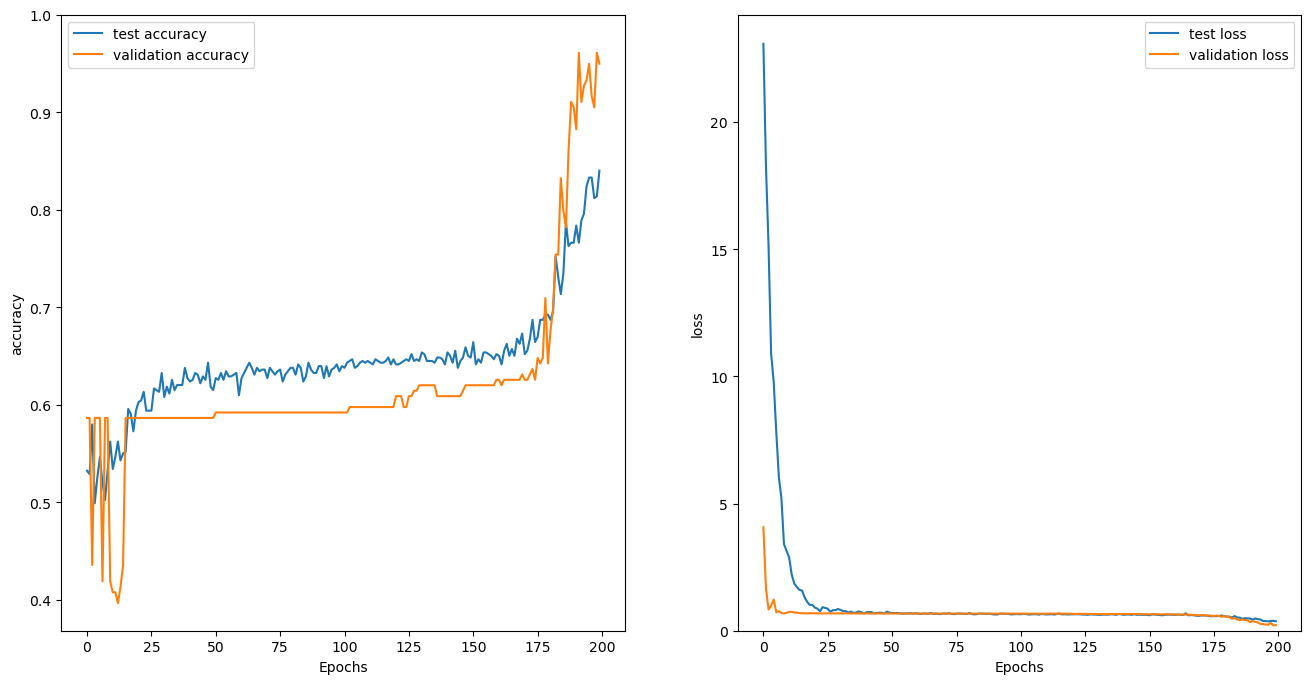

In [285]:

# afficher le graphe
def plot_graphs(histori, metric):
  plt.plot(histori.history[metric])
  plt.plot(histori.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([f'test {metric}', f'validation {metric}'])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(histori, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(histori, 'loss')
plt.ylim(0, None)

In [303]:
# Liste des colonnes à copier
engineer = [
            'SibSp', 'Parch','PassengerId',
            'Pclass_1', 'Pclass_2', 'Pclass_3',
            'Embarked_C', 'Embarked_Q', 'Embarked_S',
            'Cabin_multiple_0.0', 'Cabin_multiple_1.0', 'Cabin_multiple_2.0', 'Cabin_multiple_3.0', 'Cabin_multiple_4.0',
            'Sex_female', 'Sex_male',
            'Classe_age_0-17', 'Classe_age_18-26', 'Classe_age_27-50', 'Classe_age_51+',
            'Taille_famille_0.0', 'Taille_famille_1.0', 'Taille_famille_2.0', 'Taille_famille_3.0', 'Taille_famille_4.0',
            'Taille_famille_5.0', 'Taille_famille_6.0', 'Taille_famille_7.0', 'Taille_famille_10.0',
            'Ticket_multiple_1.0', 'Ticket_multiple_2.0', 'Ticket_multiple_3.0'
]

# Créons une nouvelle table avec les nouvelles colonnes obtenues dans l'ingénierie des données
X_test_1 = df_test_1[engineer].copy()

# Affichage de la nouvelle table
X_test_1


SibSp  Parch  PassengerId  Pclass_1  Pclass_2  Pclass_3  Embarked_C  \
0      0.0    0.0        892.0       0.0       0.0       1.0         0.0   
1      1.0    0.0        893.0       0.0       0.0       1.0         0.0   
2      0.0    0.0        894.0       0.0       1.0       0.0         0.0   
3      0.0    0.0        895.0       0.0       0.0       1.0         0.0   
4      1.0    1.0        896.0       0.0       0.0       1.0         0.0   
..     ...    ...          ...       ...       ...       ...         ...   
413    0.0    0.0       1305.0       0.0       0.0       1.0         0.0   
414    0.0    0.0       1306.0       1.0       0.0       0.0         1.0   
415    0.0    0.0       1307.0       0.0       0.0       1.0         0.0   
416    0.0    0.0       1308.0       0.0       0.0       1.0         0.0   
417    1.0    1.0       1309.0       0.0       0.0       1.0         1.0   

     Embarked_Q  Embarked_S  Cabin_multiple_0.0  ...  Taille_famille_2.0  \
0           1.0         0.0                 1.0  ...                 0.0   
1           0.0         1.0                 1.0  ...                 0.0   
2           1.0         0.0                 1.0  ...                 0.0   
3           0.0         1.0                 1.0  ...                 0.0   
4           0.0         1.0                 1.0  ...                 0.0   
..          ...         ...                 ...  ...                 ...   
413         0.0         1.0                 1.0  ...                 0.0   
414         0.0         0.0                 1.0  ...                 0.0   
415         0.0         1.0                 1.0  ...                 0.0   
416         0.0         1.0                 1.0  ...                 0.0   
417         0.0         0.0                 1.0  ...                 0.0   

     Taille_famille_3.0  Taille_famille_4.0  Taille_famille_5.0  \
0                   0.0                 0.0                 0.0   
1                   0.0                 0.0                 0.0   
2                   0.0                 0.0                 0.0   
3                   0.0                 0.0                 0.0   
4                   0.0                 0.0                 0.0   
..                  ...                 ...                 ...   
413                 0.0                 0.0                 0.0   
414                 0.0                 0.0                 0.0   
415                 0.0                 0.0                 0.0   
416                 0.0                 0.0                 0.0   
417                 0.0                 0.0                 0.0   

     Taille_famille_6.0  Taille_famille_7.0  Taille_famille_10.0  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 0.0                  0.0   
..                  ...                 ...                  ...   
413                 0.0                 0.0                  0.0   
414                 0.0                 0.0                  0.0   
415                 0.0                 0.0                  0.0   
416                 0.0                 0.0                  0.0   
417                 0.0                 0.0                  0.0   

     Ticket_multiple_1.0  Ticket_multiple_2.0  Ticket_multiple_3.0  
0                    0.0                  0.0                  0.0  
1                    0.0                  0.0                  0.0  
2                    0.0                  0.0                  0.0  
3                    0.0                  0.0                  0.0  
4                    0.0                  0.0                  0.0  
..                   ...                  ...                  ...  
413                  0.0                  0.0                  0.0  
414  

In [304]:
# This code transforms the results to binary (0 or 1) from the probabilities predicted by the model
pred_val = (model.predict(X_test)>0.5).astype(int).flatten()
len(pred_val)

6/6 [==============================] - 0s 5ms/step


179

In [293]:
pred_val

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1])

In [298]:
#This code formats the results to a submission format (Call the lab assistant to learn more about this !)
formated_results = {'PassengerId': X_test['PassengerId'], 'Survived': pred_val}
formated_results = pd.DataFrame(formated_results)
formated_results.head()

PassengerId  Survived
709        710.0         0
439        440.0         0
840        841.0         0
720        721.0         1
39          40.0         1

In [299]:
formated_results

PassengerId  Survived
709        710.0         0
439        440.0         0
840        841.0         0
720        721.0         1
39          40.0         1
..           ...       ...
433        434.0         0
773        774.0         0
25          26.0         1
84          85.0         1
10          11.0         1

[179 rows x 2 columns]

In [216]:
# df_test_1

In [301]:
# Saving the results in a csv file
formated_results.to_csv('data/titanic/results.csv', index = False)